<a href="https://colab.research.google.com/github/wehs7661/deep_learning_projects/blob/master/covid_regression/DNN_test_positive/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring feature selection and regularization: Taking the COVID-19 positive rate prediction as an example**

In this notebook, we will explore the application of various feature selection methods to the neural network for predicting the COVID-19 positive rate, using the datasets adapted from [daily surveys conducted by the Delphi Group @ CMU](https://delphi.cmu.edu/covidcast/). This notebook is adapted from the [notebook](https://github.com/ga642381/ML2021-Spring/blob/main/HW01/HW01.ipynb) written by Heng-Jui Chang @ NTUEE as the first homework in the class of 2021 Machine Learning class taught by Dr. Hung-Yi Lee @ NTUEE. The final result of the original assignment is a CSV file containing the predictions of the COVID-19 positive rate generated from the neural network built and trained in the assignment, which should be uploaded to the corresponding [Kaggle competition](https://www.kaggle.com/c/ml2021spring-hw1/data) to assess the model by calculating the test loss. 

## **1. Statement of the problem**
Now, before we dive into what feature selection methods we are going to explore, let's first understand our task by taking a look at the training set and the test set.

In [1]:
# The data below can also be downloaded from Kaggle.
tr_path = 'covid.train.csv'  # path to training data
tt_path = 'covid.test.csv'   # path to testing data

!gdown --id '19CCyCgJrUxtvgZF53vnctJiOJ23T5mqF' --output covid.train.csv
!gdown --id '1CE240jLm2npU-tdz81-oVKEF3T2yfT1O' --output covid.test.csv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=19CCyCgJrUxtvgZF53vnctJiOJ23T5mqF
To: /content/covid.train.csv
100% 2.00M/2.00M [00:00<00:00, 87.0MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1CE240jLm2npU-tdz81-oVKEF3T2yfT1O
To: /content/covid.test.csv
100% 651k/651k [00:00<00:00, 106MB/s]


In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None) # to show all coumns below
df = pd.read_csv('covid.train.csv'); df

,id,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,IL,IN,IA,KS,KY,LA,MD,MA,MI,MN,MS,MO,NE,NV,NJ,NM,NY,NC,OH,OK,OR,PA,RI,SC,TX,UT,VA,WA,WV,WI,cli,ili,hh_cmnty_cli,nohh_cmnty_cli,wearing_mask,travel_outside_state,work_outside_home,shop,restaurant,spent_time,large_event,public_transit,anxious,depressed,felt_isolated,worried_become_ill,worried_finances,tested_positive,cli.1,ili.1,hh_cmnty_cli.1,nohh_cmnty_cli.1,wearing_mask.1,travel_outside_state.1,work_outside_home.1,shop.1,restaurant.1,spent_time.1,large_event.1,public_transit.1,anxious.1,depressed.1,felt_isolated.1,worried_become_ill.1,worried_finances.1,tested_positive.1,cli.2,ili.2,hh_cmnty_cli.2,nohh_cmnty_cli.2,wearing_mask.2,travel_outside_state.2,work_outside_home.2,shop.2,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2,tested_positive.2
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.814610,0.771356,25.648907,21.242063,84.644672,13.462475,36.519841,63.139094,23.835119,44.726055,16.946929,1.716262,15.494193,12.043275,17.000647,53.439316,43.279629,19.586492,0.838995,0.807767,25.679101,21.280270,84.005294,13.467716,36.637887,63.318650,23.688882,44.385166,16.463551,1.664819,15.299228,12.051505,16.552264,53.256795,43.622728,20.151838,0.897802,0.887893,26.060544,21.503832,84.438618,13.038611,36.429119,62.434539,23.812411,43.430423,16.151527,1.602635,15.409449,12.088688,16.702086,53.991549,43.604229,20.704935
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.838995,0.807767,25.679101,21.280270,84.005294,13.467716,36.637887,63.318650,23.688882,44.385166,16.463551,1.664819,15.299228,12.051505,16.552264,53.256795,43.622728,20.151838,0.897802,0.887893,26.060544,21.503832,84.438618,13.038611,36.429119,62.434539,23.812411,43.430423,16.151527,1.602635,15.409449,12.088688,16.702086,53.991549,43.604229,20.704935,0.972842,0.965496,25.754087,21.016210,84.133873,12.581952,36.416557,62.024517,23.682974,43.196313,16.123386,1.641863,15.230063,11.809047,16.506973,54.185521,42.665766,21.292911
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.897802,0.887893,26.060544,21.503832,84.438618,13.038611,36.429119,62.434539,23.812411,43.430423,16.151527,1.602635,15.409449,12.088688,16.702086,53.991549,43.604229,20.704935,0.972842,0.965496,25.754087,21.016210,84.133873,12.581952,36.416557,62.024517,23.682974,43.196313,16.123386,1.641863,15.230063,11.809047,16.506973,54.185521,42.665766,21.292911,0.955306,0.963079,25.947015,20.941798,83.995931,12.938675,37.014578,62.116842,23.593983,43.362200,16.159971,1.677523,15.717207,12.355918,16.273294,53.637069,42.972417,21.166656
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.972842,0.965496,25.754087,21.016210,84.133873,12.581952,36.416557,62.024517,23.682974,43.196313,16.123386,1.641863,15.230063,11.809047,16.506973,54.185521,42.665766,21.292911,0.955306,0.963079,25.947015,20.941798,83.995931,12.938675,37.014578,62.116842,23.593983,43.362200,16.159971,1.677523,15.717207,12.355918,16.273294,53.637069,42.972417,21.166656,0.947513,0.968764,26.350501,21.109971,83.819531,12.452336,36.270021,61.294809,22.576992,42.954574,15.544373,1.578030,15.295650,12.218123,16.045504,52.446223,42.907472,19.896607
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.955306,0.963079,25.947015,20.941798,83.995931,12.938675,37.014578,62.116842,23.593983,43.362200,16.159971,1.677523,15.717207,12.355918,16.273294,53.637069,42.972417,21.166656,0.947

As shown above, the training set has 2700 samples and 95 columns, which include:
- 1 column of the IDs
- 40 columns showing the states encoded to one-hot vectors
- 18 columns of Day 1 features
- 18 columns of Day 2 features
- 18 columns of Day 3 features

More specifically, the 18 features for each day include the follows:
- 4 columns of COVID-like illness, including
  - `ili`: Percentage of people having influenza-like illness
  - `cli`: Percentage of people having COVID-like illness
  - `hh_cmnty_cli`: Percentage of people reporintg illness in their local community, including their household
  - `noww_cmnty_cli`: Percentage of people reporting illness in their local community, not including their household 
- 8 columns of behavior indicators, including `wearing_mask`, `travel_outside_state`, `work_outside_home`, `shop`, `restaurant`, `spent_time`, `large_event`, and `public_transit`. Most names of indicators are self-explanatory, except for `spent_time`, which is the percentage of respondents who spent time indoors with someone who isn't currently staying with them in the past 24 hours. 
- 5 columns of mental health indicators, including `anxious`, `depressed`, `felt_isolated`, `worried_become_ill`, and `worried_finances`.
- 1 column showing the percentage of people who tested positive

All indicators above are expressed in percentages. For more details about how the data was collected and how the indicators were designed, please visit [this site](https://cmu-delphi.github.io/delphi-epidata/api/covidcast-signals/fb-survey.html).



As for the test set, there are 893 samples and 94 columns, with the only missing column compared with the training set being the test positive rate of Day 3 that we are going to predict using any of the 93 possible indicators as the features.

## **2. Building our first neural network without feature selection**
### **2-1. Setting things up**
First, we import the following packages, define a function for getting the device to be used, set the random seed and specify settings for plotting:

In [3]:
# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# For data preprocess
import numpy as np
import csv
import os

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc
from matplotlib.pyplot import figure

def get_device():
    ''' Get device (if GPU is available, use GPU) '''
    return 'cuda' if torch.cuda.is_available() else 'cpu'

def set_seed(seed=0):
    # set a random seed for reproducibility
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed()

rc('font', **{
    'family': 'sans-serif',
    'sans-serif': ['DejaVu Sans'],
    'size': 10
})
# Set the font used for MathJax - more on this later
rc('mathtext', **{'default': 'regular'})
plt.rc('font', family='serif') 

In [4]:
def change_color(ax, color):
    # For better presentation in the webpage
    ax.tick_params(color=color, labelcolor=color)
    for spine in ax.spines.values():
        spine.set_edgecolor(color)

### **2-2. Data preprocessing**
First of all, we define `COVID19Dataset`, which reads in `.csv` files, extracts features, splits `covid.train.csv` into the training/validation sets (with a ratio of 9:1) and normalizes features. 

In [5]:
class COVID19Dataset(Dataset):
    ''' Dataset for loading and preprocessing the COVID19 dataset '''
    def __init__(self, path, mode='train', feats=list(range(93))):
        """
        Prepares a dataset as specified.

        Parameters
        ----------
        path : str
            The path of the training dataset or the test set. 
        mode : str
            How the dataset should be prepared. Available options include "train", 
            "dev", and "test".
        feats: 
            The list of feature indices to consider.
        """
        self.mode = mode

        # Step 1: Read data into numpy arrays
        with open(path, 'r') as fp:
            data = list(csv.reader(fp))
            data = np.array(data[1:])[:, 1:].astype(float) # note that the ID has been left out
        
        # Step 2: Prepare the dataset
        if mode == 'test':
            # Testing data
            # data: 893 x 93 (40 states + day 1 (18) + day 2 (18) + day 3 (17))
            data = data[:, feats]
            self.data = torch.FloatTensor(data)
        else:
            # Training data (train/dev sets)
            # data: 2700 x 94 (40 states + day 1 (18) + day 2 (18) + day 3 (18))
            target = data[:, -1]
            data = data[:, feats]
            
            # Splitting training data into train & dev sets
            if mode == 'train':
                indices = [i for i in range(len(data)) if i % 10 != 0]
            elif mode == 'dev':
                indices = [i for i in range(len(data)) if i % 10 == 0]
            
            # Convert data into PyTorch tensors
            self.data = torch.FloatTensor(data[indices])
            self.target = torch.FloatTensor(target[indices])

        # Step 3: Normalize features (you may remove this part to see what will happen)
        self.data[:, 40:] = (self.data[:, 40:] - self.data[:, 40:].mean(dim=0, keepdim=True)) / self.data[:, 40:].std(dim=0, keepdim=True)
        self.dim = self.data.shape[1]

        print(f'Finished reading the {mode} set of COVID19 Dataset ({len(self.data)} samples found, each dim = {self.dim})')

    def __getitem__(self, index):
        # Returns one sample at a time
        if self.mode in ['train', 'dev']:
            # For training
            return self.data[index], self.target[index]
        else:
            # For testing (no target)
            return self.data[index]

    def __len__(self):
        # Returns the size of the dataset
        return len(self.data)

Also, we need data loaders to load in the datasets as needed.  

In [6]:
def prep_dataloader(path, mode, batch_size, feats):
    dataset = COVID19Dataset(path, mode=mode, feats=feats)
    dataloader = DataLoader(dataset, batch_size, shuffle=(mode == 'train'), drop_last=False, pin_memory=True)
    return dataloader

Then, we define a general neural network by defining the class `NeuralNet`.

In [7]:
class NeuralNet(nn.Module):
    ''' A simple fully-connected deep neural network '''
    def __init__(self, input_dim, n_relu=64, n_hidden_layers=1):
        super(NeuralNet, self).__init__()
        self.nn = nn.Sequential()
        for i in range(n_hidden_layers):
            self.nn.add_module(f'Linear {i}', torch.nn.Linear(input_dim, n_relu))
            self.nn.add_module(f'Activation {i}', torch.nn.ReLU())
            input_dim = n_relu
        self.nn.add_module('Output', torch.nn.Linear(n_relu, 1))
        self.criterion = nn.MSELoss(reduction='mean')

    def forward(self, x):
        x = self.nn(x).squeeze(1)
        return x

    def cal_loss(self, pred, target):
        return self.criterion(pred, target)

Also, here we have funcitons for training, validating, and testing the neural network.

In [8]:
def train(tr_set, dv_set, model, config, device):
    n_epochs = config['n_epochs']  # Maximum number of epochs
    optimizer = getattr(torch.optim, config['optimizer'])(
        model.parameters(), **config['optim_hparas'])
    min_mse = 1000.
    loss_record = {'train': [], 'dev': []}      # for recording training loss
    early_stop_cnt = 0
    epoch = 0
    while epoch < n_epochs:
        model.train()                           # set model to training mode
        for x, y in tr_set:                     # iterate through the dataloader
            optimizer.zero_grad()               # set gradient to zero
            x, y = x.to(device), y.to(device)   # move data to device (cpu/cuda)
            pred = model(x)                     # forward pass (compute output)
            mse_loss = model.cal_loss(pred, y)  # compute loss
            mse_loss.backward()                 # compute gradient (backpropagation)
            optimizer.step()                    # update model with optimizer
            loss_record['train'].append(mse_loss.detach().cpu().item())

        # After each epoch, test your model on the validation (development) set.
        dev_mse = dev(dv_set, model, device)
        if dev_mse < min_mse:
            # Save model if your model improved
            min_mse = dev_mse
            print(f'Saving model (epoch = {epoch + 1}, validation loss = {min_mse:.4f}')
            torch.save(model.state_dict(), config['save_path'])  # Save model to specified path
            early_stop_cnt = 0
        else:
            early_stop_cnt += 1

        epoch += 1
        loss_record['dev'].append(dev_mse)
        if early_stop_cnt > config['early_stop']:
            # Stop training if your model stops improving for "config['early_stop']" epochs.
            break

    print('Finished training after {} epochs'.format(epoch))
    return min_mse, loss_record

In [9]:
def dev(dv_set, model, device):
    model.eval()                                # set model to evalutation mode
    total_loss = 0
    for x, y in dv_set:                         # iterate through the dataloader
        x, y = x.to(device), y.to(device)       # move data to device (cpu/cuda)
        with torch.no_grad():                   # disable gradient calculation
            pred = model(x)                     # forward pass (compute output)
            mse_loss = model.cal_loss(pred, y)  # compute loss
        total_loss += mse_loss.detach().cpu().item() * len(x)  # accumulate loss
    total_loss = total_loss / len(dv_set.dataset)              # compute averaged loss

    return total_loss

In [10]:
def test(tt_set, model, device):
    model.eval()                                # set model to evalutation mode
    preds = []
    for x in tt_set:                            # iterate through the dataloader
        x = x.to(device)                        # move data to device (cpu/cuda)
        with torch.no_grad():                   # disable gradient calculation
            pred = model(x)                     # forward pass (compute output)
            preds.append(pred.detach().cpu())   # collect prediction
    preds = torch.cat(preds, dim=0).numpy()     # concatenate all predictions and convert to a numpy array
    return preds

Then, we define the function `nn_workflow` to combine all three functions above, as we are going to test out a lot of different models.

In [11]:
def nn_workflow(config, tr_path='covid.train.csv', tt_path='covid.test.csv'):
    device = get_device()                    # get the current available device ('cpu' or 'cuda')
    os.makedirs('models', exist_ok=True)     # The trained model will be saved to ./models/

    tr_set = prep_dataloader(tr_path, 'train', config['batch_size'], feats=config['feats'])
    dv_set = prep_dataloader(tr_path, 'dev', config['batch_size'], feats=config['feats'])
    tt_set = prep_dataloader(tt_path, 'test', config['batch_size'], feats=config['feats'])

    model = NeuralNet(tr_set.dataset.dim).to(device)  # Construct model and move to device

    model_loss, model_loss_record = train(tr_set, dv_set, model, config, device)    # start training the model!

    return {'tr_set': tr_set, 'dv_set': dv_set, 'tt_set': tt_set}, model, model_loss_record

Now, let's build and train our first neural network, which will use all the possible 93 indicators as features (i.e. no feature selection at all). Note that the hyper-parameters defined in `config` are different from the ones used in the orginal notebook written by Chang as this set of parameters work better with the neural networks we are going to build later.

In [12]:
config = {
    'feats': list(range(93)),        # consider all features (i.e. no feature selection)    
    'n_epochs': 10000,               # maximum number of epochs
    'batch_size': 128,               # mini-batch size for dataloader
    'optimizer': 'Adam',             # optimization algorithm (optimizer in torch.optim)
    'optim_hparas': {},              # Here we just use the defaults
    'early_stop': 500,               # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': 'models/model.pth'  # your model will be saved here
}

datasets, model, loss_record = nn_workflow(config)

Finished reading the train set of COVID19 Dataset (2430 samples found, each dim = 93)
Finished reading the dev set of COVID19 Dataset (270 samples found, each dim = 93)
Finished reading the test set of COVID19 Dataset (893 samples found, each dim = 93)
Saving model (epoch = 1, validation loss = 277.5056
Saving model (epoch = 2, validation loss = 227.9606
Saving model (epoch = 3, validation loss = 165.7882
Saving model (epoch = 4, validation loss = 103.9075
Saving model (epoch = 5, validation loss = 60.1904
Saving model (epoch = 6, validation loss = 39.3025
Saving model (epoch = 7, validation loss = 32.0575
Saving model (epoch = 8, validation loss = 29.1716
Saving model (epoch = 9, validation loss = 27.1532
Saving model (epoch = 10, validation loss = 25.3724
Saving model (epoch = 11, validation loss = 23.7637
Saving model (epoch = 12, validation loss = 22.2342
Saving model (epoch = 13, validation loss = 20.6818
Saving model (epoch = 14, validation loss = 19.1392
Saving model (epoch = 15

As shown above, the model was trained for 1128 epochs and the minimum loss validation loss was 0.7604. Below we show the time seris of the losses and the parity plot between our predictions and the labels.

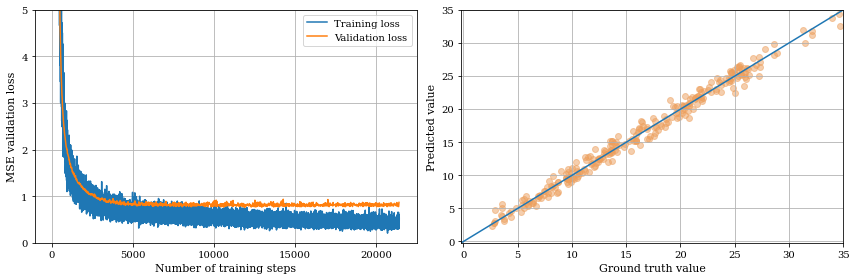

In [13]:
fig = plt.figure(figsize=(12, 4))

color = 'black'

# Prepare data for the left panel
total_steps = len(loss_record['train'])
x_1 = range(total_steps)
x_2 = x_1[::len(loss_record['train']) // len(loss_record['dev'])]

# Plot the left panel: The training/validation loss as a function of time
ax0 = fig.add_subplot(121)
plt.plot(x_1, loss_record['train'], c='C0', label='Training loss')
plt.plot(x_2, loss_record['dev'], c='C1', label='Validation loss')
plt.ylim(0.0, 5.)
plt.xlabel('Number of training steps', color=color, fontsize=11)
plt.ylabel('MSE validation loss', color=color, fontsize=11)
plt.legend()
plt.grid()
change_color(ax0, color)

# Prepare data for the right panel
del model
device = get_device()
model = NeuralNet(datasets['tr_set'].dataset.dim).to(device)
ckpt = torch.load(config['save_path'], map_location='cpu')  # Load your best model
model.load_state_dict(ckpt)

model.eval()
preds, targets = [], []
for x, y in datasets['dv_set']:
    x, y = x.to(device), y.to(device)
    with torch.no_grad():
        pred = model(x)
        preds.append(pred.detach().cpu())
        targets.append(y.detach().cpu())
preds = torch.cat(preds, dim=0).numpy()
targets = torch.cat(targets, dim=0).numpy()

# Plot the right figure: The parity plot between our predictions and the labels
ax1 = fig.add_subplot(122)
plt.scatter(targets, preds, c='#ed9f5c', alpha=0.5)
plt.plot([-0.2, 35], [-0.2, 35], color='C0')
plt.xlim(-0.2, 35)
plt.ylim(-0.2, 35)
plt.xlabel('Ground truth value', color=color, fontsize=11)
plt.ylabel('Predicted value', color=color, fontsize=11)
plt.grid()

change_color(ax1, color)
plt.tight_layout()
plt.savefig('model_no_selection.png', dpi=600, transparent=True)

plt.show()

The most importantly, we need to save predictions and upload it to Kaggle to assess the model by calculating the test loss.

In [14]:
def save_pred(tt_set, model, pred_path):
    device = get_device()
    preds = test(tt_set, model, device)

    with open(pred_path, 'w') as fp:
        writer = csv.writer(fp)
        writer.writerow(['id', 'tested_positive'])
        for i, p in enumerate(preds):
            writer.writerow([i, p])

In [15]:
del model
device = get_device()
model = NeuralNet(datasets['tr_set'].dataset.dim).to(device)
ckpt = torch.load(config['save_path'], map_location='cpu')  # Load your best model
model.load_state_dict(ckpt)

save_pred(datasets['tt_set'], model, 'pred_0.csv')

As can be examined on Kaggle, the predictions in `pred_0.csv` have a test loss of 2.0972, which is much higher than the minimum validation loss of 0.7604. In fact, as examined in my [another notebook](https://github.com/wehs7661/deep_learning_projects/blob/master/covid_regression/DNN_test_positive/covid_regression_test_positive.ipynb), this model actually had an issue of overfitting as consider all the 93 features. Therefore, let's try out different feature selection methods to see if the test loss can be improved.

## **3. Filter-based feature selection**
Filter-based selection methods filter out features based on a user-selected metric. For example, one could examine the absolute value of the Pearson's correlation coefficient ($r$) between the target and each of the features and keep the top $k$ features that have the highest value of $r$. In `scikit-learn`, the following metrics are available. (Check the [documentation](https://scikit-learn.org/stable/modules/feature_selection.html) of scikit-learn for more informaiton.)
- For regression
  - Pearson correlation coefficient ([`r_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.r_regression.html#sklearn.feature_selection.r_regression))
  - F-statistics ([`f_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression))
  - Mutual information for a continuous target variable ([`mutual_info_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression))
- For classification
  - $\chi^2$ value ([chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2))
  - ANOVA F-value ([`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2))
  - Mutual information for a discrete target variable ([`mutual_info_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif))


Notably, some people also use principal component analysis (PCA) to estimate the contribution of each of the transformed features (i.e. principal components, which are linear combinations of the original features) to the variance of the output variable, and leave out the ones that contribute the least. Here, we will just focus on non-transformed features to make different methods more directly comparable. Specifically, below we try all the three metrics for regression in our filter-based feature selection. Note that we use `SelectKBest` to select the top $k$ features with the highest scores, but one could also select the highest scoring percentage of features with `SelectPercentile` or other tools like `SelectFpr`, `SelectFdr`, `SelectFwe`, or `GenericUnivariateSelect`. Here, we will only use `SelectKBest` for now. 

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression             # metric 1 
from sklearn.feature_selection import f_regression             # metric 2
from sklearn.feature_selection import mutual_info_regression   # metric 3

Notably, there is no need to standardize the input data since these metrics are all indepedent of scaling/translation of data.

In [17]:
data = pd.read_csv('covid.train.csv')
x = data[data.columns[1:94]]
y = data[data.columns[94]]

In [18]:
def filter_features(x, y, score_func):
    best_feats = SelectKBest(score_func=score_func, k=5)  # the value of k doesn't matter since we will decide how many to pick later
    fit = best_feats.fit(x, y)

    result = pd.concat([pd.DataFrame(data.columns[1:94]), pd.DataFrame(fit.scores_)], axis=1)
    result.columns = ['Features', 'Score']
    print(result.nlargest(15, 'Score'))  # print the best 15 features

    # Below we generate a list of indices corresponding to all features ranked from the highest score to the lowest
    idx_list = [result.nlargest(len(result), 'Score').iloc[i].name for i in range(len(result))] 

    return idx_list

First, we try to use the Pearson correlation coefficient as the metric:

In [19]:
pd.set_option('display.max_rows', 15) # to show all rows below
idx_list_0 = filter_features(x, y, r_regression)

              Features     Score
75   tested_positive.1  0.991012
57     tested_positive  0.981165
42        hh_cmnty_cli  0.879724
60      hh_cmnty_cli.1  0.879438
78      hh_cmnty_cli.2  0.878218
43      nohh_cmnty_cli  0.869938
61    nohh_cmnty_cli.1  0.869278
79    nohh_cmnty_cli.2  0.867535
40                 cli  0.838504
58               cli.1  0.838224
76               cli.2  0.835751
41                 ili  0.830527
59               ili.1  0.829200
77               ili.2  0.826075
92  worried_finances.2  0.485843


Then, we use F-statistics as the metric by using `f_regression`, which is derived from `r_regression` and will rank features in the same order if all the features are positively correlated with the target. Also note that the scores of `f_regression` should be non-negative, while the scores of `r_regression` lie in [-1, 1].

In [20]:
idx_list_1 = filter_features(x, y, f_regression)

              Features          Score
75   tested_positive.1  148069.658278
57     tested_positive   69603.872591
42        hh_cmnty_cli    9235.492094
60      hh_cmnty_cli.1    9209.019558
78      hh_cmnty_cli.2    9097.375172
43      nohh_cmnty_cli    8395.421300
61    nohh_cmnty_cli.1    8343.255927
79    nohh_cmnty_cli.2    8208.176435
40                 cli    6388.906849
58               cli.1    6374.548000
76               cli.2    6250.008702
41                 ili    5998.922880
59               ili.1    5937.588576
77               ili.2    5796.947672
92  worried_finances.2     833.613191


Finally, we try the mutual information, which should also lead to non-negative scores.

In [21]:
idx_list_2 = filter_features(x, y, mutual_info_regression)

             Features     Score
75  tested_positive.1  2.047046
57    tested_positive  1.664485
78     hh_cmnty_cli.2  0.980131
42       hh_cmnty_cli  0.974385
60     hh_cmnty_cli.1  0.971687
43     nohh_cmnty_cli  0.967492
79   nohh_cmnty_cli.2  0.960283
61   nohh_cmnty_cli.1  0.956382
58              cli.1  0.767732
77              ili.2  0.763468
40                cli  0.755316
59              ili.1  0.743957
76              cli.2  0.740273
41                ili  0.732601
84       restaurant.2  0.551297


As can be examined below, different metrics lead to different orders of the feature ranking, but the first 14 features selected by different metrics are all the same one. Therefore, we will use these 14 features for later training. 

In [22]:
print(idx_list_0[:15])
print(idx_list_1[:15])
print(idx_list_2[:15])

[75, 57, 42, 60, 78, 43, 61, 79, 40, 58, 76, 41, 59, 77, 92]
[75, 57, 42, 60, 78, 43, 61, 79, 40, 58, 76, 41, 59, 77, 92]
[75, 57, 78, 42, 60, 43, 79, 61, 58, 77, 40, 59, 76, 41, 84]


Below we train a new neural network with only 14 features, using exactly the same hyper-parameters.

In [23]:
config = {
    'feats': idx_list_0[:14],        # only consider the best 14 features as decided above
    'n_epochs': 10000,               # maximum number of epochs
    'batch_size': 128,               # mini-batch size for dataloader
    'optimizer': 'Adam',             # optimization algorithm (optimizer in torch.optim)
    'optim_hparas': {},              # Here we just use the default
    'early_stop': 500,               # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': 'models/model.pth'  # your model will be saved here
}

datasets, model, loss_record = nn_workflow(config)

Finished reading the train set of COVID19 Dataset (2430 samples found, each dim = 14)
Finished reading the dev set of COVID19 Dataset (270 samples found, each dim = 14)
Finished reading the test set of COVID19 Dataset (893 samples found, each dim = 14)
Saving model (epoch = 1, validation loss = 8.8931
Saving model (epoch = 2, validation loss = 8.7802
Saving model (epoch = 3, validation loss = 5.7027
Saving model (epoch = 4, validation loss = 3.9171
Saving model (epoch = 5, validation loss = 2.9314
Saving model (epoch = 6, validation loss = 2.1810
Saving model (epoch = 7, validation loss = 1.6694
Saving model (epoch = 8, validation loss = 1.4024
Saving model (epoch = 9, validation loss = 1.2429
Saving model (epoch = 10, validation loss = 1.1950
Saving model (epoch = 11, validation loss = 1.1886
Saving model (epoch = 12, validation loss = 1.1400
Saving model (epoch = 13, validation loss = 1.1336
Saving model (epoch = 15, validation loss = 1.1213
Saving model (epoch = 18, validation loss 

Again, we save our predictions and upload them to Kaggle and calculate the test loss.

In [24]:
del model
device = get_device()
model = NeuralNet(datasets['tr_set'].dataset.dim).to(device)
ckpt = torch.load(config['save_path'], map_location='cpu')  # Load your best model
model.load_state_dict(ckpt)

save_pred(datasets['tt_set'], model, 'pred_1.csv')

As can be examined on Kaggle, the test loss of our model with feature selection goes down to 0.9168, which is much lower than the original test loss. Notably, the validation loss of the second model is slightly higher than the one in the first model, but the test loss is much lower. This indicates that the original model without feature selection indeed had an issue of overfitting such that the model trained on the validation set failed to generalize to unseen examples in the test set. 

## **4. Wrapper-based feature selection**
In contrast to filter-based methods, which do not incorporate a specific machine learning algorithm, wrapper-based methods create models with different subset of input features and evaluate them on a specific machine learning method to find the optimal features that maximize the model performance. Common examples of wrapper-based feature selection methods include recursive feature elimination (RFE), sequential feature selection (SFS), and permutation importance. Generally, wrapper-based methods are much slower than the filter-based methods in terms of time complexity because they iteratively fit the datasets to different models.

### **4-1. Recursive feature elimination (RFE)**
The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a `coef_` attribute or through a `feature_importances_` attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [25]:
data = pd.read_csv('covid.train.csv')
x = data[data.columns[1:94]]
y = data[data.columns[94]]

Below we will use the negative root-mean-squared error as the scording metric (so the higher score the better) in the 5-fold cross validation for determining the number of features to be selected. The input data need to be standardized since MSE is sensitive to the scale of the data. Notably, here we will not consider the categorial features (i.e. the one-hot vectors) but just numerical features to save time. After all, the one-hot vectors do seem less important in our previous analysis. 

In [26]:
x[x.columns[40:]] = (x[x.columns[40:]] - x[x.columns[40:]].mean(axis=0)) / (x[x.columns[40:]].std(axis=0))
y = (y - y.mean(axis=0)) / (y.std(axis=0))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [27]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

rfe_selector = RFECV(estimator=LinearRegression(), scoring='neg_mean_squared_error')
rfe_selector.fit(x[x.columns[40:]], y)
rfe_support = rfe_selector.get_support()
rfe_feature = x[x.columns[40:]].iloc[:, rfe_support].columns.tolist()
feats_str = '\n  '.join(rfe_feature)
print(f'The following {len(rfe_feature)} features are selected: \n  {feats_str}')

The following 11 features are selected: 
  cli
  hh_cmnty_cli
  nohh_cmnty_cli
  ili.1
  hh_cmnty_cli.1
  nohh_cmnty_cli.1
  travel_outside_state.1
  tested_positive.1
  ili.2
  hh_cmnty_cli.2
  travel_outside_state.2


As shown above, 11 featues were selected. Below we retrieve their indices in the original set of features. Note that the type of the elements in `rfe_support` is `np.bool_` instead of `bool`.

In [28]:
rfe_idx = [40 + i for i in range(53) if rfe_support[i] == np.bool_(True)]
rfe_idx

[40, 42, 43, 59, 60, 61, 63, 75, 77, 78, 81]

Then, we train a new model based on these 11 features:

In [29]:
config = {
    'feats': rfe_idx,        # only consider the best 14 features as decided above
    'n_epochs': 10000,               # maximum number of epochs
    'batch_size': 128,               # mini-batch size for dataloader
    'optimizer': 'Adam',             # optimization algorithm (optimizer in torch.optim)
    'optim_hparas': {},              # Here we just use the default
    'early_stop': 500,               # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': 'models/model.pth'  # your model will be saved here
}

datasets, model, loss_record = nn_workflow(config)

Finished reading the train set of COVID19 Dataset (2430 samples found, each dim = 11)
Finished reading the dev set of COVID19 Dataset (270 samples found, each dim = 11)
Finished reading the test set of COVID19 Dataset (893 samples found, each dim = 11)
Saving model (epoch = 1, validation loss = 75.0152
Saving model (epoch = 2, validation loss = 17.5906
Saving model (epoch = 3, validation loss = 15.9701
Saving model (epoch = 4, validation loss = 14.0017
Saving model (epoch = 5, validation loss = 12.2875
Saving model (epoch = 6, validation loss = 10.9457
Saving model (epoch = 7, validation loss = 9.7390
Saving model (epoch = 8, validation loss = 8.6220
Saving model (epoch = 9, validation loss = 7.6320
Saving model (epoch = 10, validation loss = 6.7921
Saving model (epoch = 11, validation loss = 6.1777
Saving model (epoch = 12, validation loss = 5.3648
Saving model (epoch = 13, validation loss = 4.7591
Saving model (epoch = 14, validation loss = 4.2104
Saving model (epoch = 15, validation

Again, we save the predictions generated by this model and upload them to Kaggle.

In [30]:
del model
device = get_device()
model = NeuralNet(datasets['tr_set'].dataset.dim).to(device)
ckpt = torch.load(config['save_path'], map_location='cpu')  # Load your best model
model.load_state_dict(ckpt)

save_pred(datasets['tt_set'], model, 'pred_2.csv')

As a result, the test loss calculated by Kaggle was around 0.92094, which is pretty close to what we got from the model using the filter-based methods. Notably, `RFECV` is also available in `yellowbrick`. `RFECV` in `yellowbrick` basically works the same as `RFECV` in `scikit-learn` but is more convenient to plot the cross-validation score as a funciton of the number of selected features, as shown below.

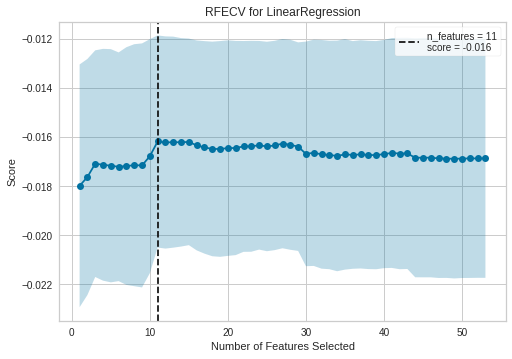

In [31]:
from yellowbrick.model_selection.rfecv import RFECV
rfe_selector = RFECV(LinearRegression(), X=x[x.columns[40:]], y=y, cv=5, scoring='neg_mean_squared_error')
rfe_selector.fit(x[x.columns[40:]], y)
rfe_selector.show()

### **4-2. Sequential feature selection (SFS)**
To perform an exhaustive search, we will need to evaluate $\sum_{i}^m C^{m}_{i}$ models, where $m$ is the number of features. In our case, $m=93$ and $\sum_{i}^m C^{m}_{i}=9.9 \times 10^{27}$, which is apparently far more than we could afford. (Even if we only consider the 53 numerical features, $\sum_{i}^m C^{m}_{i}=9.0 \times 10^{15}$.)




In [32]:
from mlxtend.math import num_combinations
print(np.sum([num_combinations(93, i) for i in range(93)]))
print(np.sum([num_combinations(53, i) for i in range(53)]))

9903520314283042199192993791
9007199254740991


Fortunately, sequential feature selection (SFS) methods are generally a good approxmation of the exhaustive search. Being a family of greedy search algorithms, they can effectively reduce the dimension of the search space by making the locally optimal choice at each iteration. 

There are several common variations of SFS methods, including: 
- Sequential forward selection (or simply forward selection)
- Sequential backward selection (or simply backward elimination)
- Sequential floating forward selection
- Sequential floating backward selection

Both `scikit-learn` and `mlxtend` can perform the first two variations, but only `mlxtend` can perform the floating varitions, so we will use `mlxtend` to apply all the four methods listed above. Below we use the standarized datasets we generated previously. Similarly, we will ignore the categorical features as we did before. For more information about the theory of SFS and how to use `mlxtend` to apply SFS and some additional analysis not presented here, please refer to the [user manual of `mlextend`](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/).

#### **4-2-1. Sequential forward selection**

In [33]:
import joblib
import sys 
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [34]:
sfs1 = SFS(LinearRegression(),
           k_features='best', 
           forward=True, 
           floating=False, 
           scoring='neg_mean_squared_error', 
           cv=5)

sfs1 = sfs1.fit(x[x.columns[40:]], y)

In the cell above, we let `SFS` decide the optimal number of features using 5-fold cross validation, using the negative MSE as the scoring function. To inspect the results, we can check the attributes of `sfs1` as follows, which are very informative.

In [35]:
# Note that the features below are just ranked based on their indices, not importance.
print(f'{len(sfs1.k_feature_idx_)} features were chosen. These features include the follows: \n {sfs1.k_feature_names_}.')
print(f'Also, the corresponding indices (in the original feature set) are: \n{np.array(sfs1.k_feature_idx_) + 40}')

31 features were chosen. These features include the follows: 
 ('cli', 'ili', 'hh_cmnty_cli', 'nohh_cmnty_cli', 'shop', 'spent_time', 'large_event', 'public_transit', 'anxious', 'depressed', 'tested_positive', 'cli.1', 'ili.1', 'hh_cmnty_cli.1', 'nohh_cmnty_cli.1', 'shop.1', 'spent_time.1', 'large_event.1', 'public_transit.1', 'anxious.1', 'depressed.1', 'tested_positive.1', 'cli.2', 'ili.2', 'hh_cmnty_cli.2', 'nohh_cmnty_cli.2', 'work_outside_home.2', 'shop.2', 'spent_time.2', 'large_event.2', 'public_transit.2').
Also, the corresponding indices (in the original feature set) are: 
[40 41 42 43 47 49 50 51 52 53 57 58 59 60 61 65 67 68 69 70 71 75 76 77
 78 79 82 83 85 86 87]


From `sfs1_subsets_` (which is a dictionary with the keys as numbers from 1 to 93), we could know more information about each of the 93 iterations, including the 5 cross validation scores, their average, and the selected features. For example, below we print out the first 10 iterations.

In [36]:
# Note that the feature indices shown here are the indices in the feature subset
for i in range(10):
    key = list(sfs1.subsets_.keys())[i]
    print(f'Iteration {i + 1}: {sfs1.subsets_[key]}')

Iteration 1: {'feature_idx': (35,), 'cv_scores': array([-0.01927195, -0.02355226, -0.02212969, -0.01004986, -0.01492524]), 'avg_score': -0.017985798638964386, 'feature_names': ('tested_positive.1',)}
Iteration 2: {'feature_idx': (35, 37), 'cv_scores': array([-0.01891412, -0.02281663, -0.02090635, -0.0094241 , -0.01434518]), 'avg_score': -0.017281275444620457, 'feature_names': ('tested_positive.1', 'ili.2')}
Iteration 3: {'feature_idx': (19, 35, 37), 'cv_scores': array([-0.01738046, -0.02107815, -0.01960367, -0.00904374, -0.01422079]), 'avg_score': -0.016265363703469315, 'feature_names': ('ili.1', 'tested_positive.1', 'ili.2')}
Iteration 4: {'feature_idx': (19, 35, 37, 39), 'cv_scores': array([-0.01724881, -0.02095589, -0.01954365, -0.00906664, -0.01423112]), 'avg_score': -0.016209222151400672, 'feature_names': ('ili.1', 'tested_positive.1', 'ili.2', 'nohh_cmnty_cli.2')}
Iteration 5: {'feature_idx': (3, 19, 35, 37, 39), 'cv_scores': array([-0.01769202, -0.02046882, -0.01931546, -0.00904

We could also try to figure out which feature got selected in each round.

In [37]:
idx = []

for i in range(len(sfs1.subsets_.keys())):
    key = list(sfs1.subsets_.keys())[i]
    if i == 0:
        idx.append(sfs1.subsets_[key]['feature_idx'][0])
        feats_idx_previous = set(sfs1.subsets_[key]['feature_idx'])
    else:
        feats_idx_current = set(sfs1.subsets_[key]['feature_idx'])
        idx.append(list(feats_idx_current - feats_idx_previous)[0])
        feats_idx_previous = set(sfs1.subsets_[key]['feature_idx'])

print('The feature got selected in each iteration:')
for i in range(len(sfs1.subsets_.keys())):
    print
    print(f'Iteration {i}: {x.columns[idx[i] + 40]}')

The feature got selected in each iteration:
Iteration 0: tested_positive.1
Iteration 1: ili.2
Iteration 2: ili.1
Iteration 3: nohh_cmnty_cli.2
Iteration 4: nohh_cmnty_cli
Iteration 5: tested_positive
Iteration 6: cli.2
Iteration 7: cli
Iteration 8: anxious
Iteration 9: anxious.1
Iteration 10: nohh_cmnty_cli.1
Iteration 11: ili
Iteration 12: cli.1
Iteration 13: depressed.1
Iteration 14: depressed
Iteration 15: public_transit.1
Iteration 16: public_transit.2
Iteration 17: hh_cmnty_cli
Iteration 18: hh_cmnty_cli.1
Iteration 19: hh_cmnty_cli.2
Iteration 20: public_transit
Iteration 21: work_outside_home.2
Iteration 22: large_event
Iteration 23: spent_time.2
Iteration 24: spent_time
Iteration 25: large_event.2
Iteration 26: large_event.1
Iteration 27: spent_time.1
Iteration 28: shop.1
Iteration 29: shop.2
Iteration 30: shop
Iteration 31: work_outside_home.1
Iteration 32: work_outside_home
Iteration 33: restaurant.2
Iteration 34: restaurant
Iteration 35: restaurant.1
Iteration 36: anxious.2


The attribute `get_metric_dict` provide a lot of (actually more) information for each iteration as well. Below we tabulate the information.

In [38]:
metric_dict_1 = sfs1.get_metric_dict(confidence_interval=0.95)
result = pd.DataFrame.from_dict(metric_dict_1).T
result

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(35,)","[-0.019271950041066428, -0.023552255915925396,...",-0.017986,"(tested_positive.1,)",0.006353,0.004943,0.002471
2,"(35, 37)","[-0.018914123466337623, -0.022816625697143225,...",-0.017281,"(tested_positive.1, ili.2)",0.006212,0.004833,0.002417
3,"(19, 35, 37)","[-0.017380464225647575, -0.021078154742476436,...",-0.016265,"(ili.1, tested_positive.1, ili.2)",0.00551,0.004287,0.002143
4,"(19, 35, 37, 39)","[-0.017248812668502405, -0.020955886309990377,...",-0.016209,"(ili.1, tested_positive.1, ili.2, nohh_cmnty_c...",0.005443,0.004235,0.002117
5,"(3, 19, 35, 37, 39)","[-0.017692017636190886, -0.02046882453236554, ...",-0.016066,"(nohh_cmnty_cli, ili.1, tested_positive.1, ili...",0.00536,0.00417,0.002085
...,...,...,...,...,...,...,...
49,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-0.018294340754169355, -0.021483850075892, -0...",-0.016524,"(cli, ili, hh_cmnty_cli, nohh_cmnty_cli, trave...",0.005805,0.004516,0.002258
50,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-0.018250753757065835, -0.021440402455474194,...",-0.016527,"(cli, ili, hh_cmnty_cli, nohh_cmnty_cli, trave...",0.005793,0.004507,0.002254
51,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-0.018402161716038944, -0.022792611560741798,...",-0.016825,"(cli, ili, hh_cmnty_cli, nohh_cmnty_cli, trave...",0.006214,0.004835,0.002417
52,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.01841236593978077, -0.02296467978242637, -...",-0.016866,"(cli, ili, hh_cmnty_cli, nohh_cmnty_cli, weari...",0.006262,0.004872,0.002436


Or, we can choose to plot the average CV score as a function of the number of features as follows.

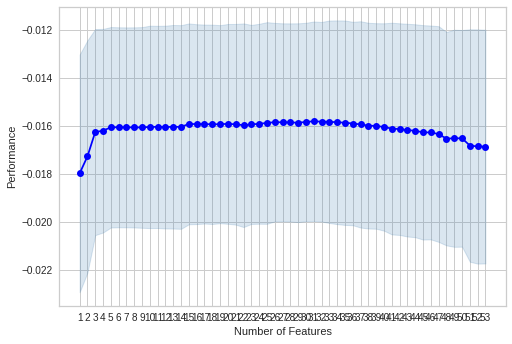

In [39]:
from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs 

fig = plt_sfs(metric_dict_1, kind='std_dev') # use the standard deviation as the error bar

Finally, since 31 features were chosen, we build a model based on these 31 features and assess its predicitons as below:

In [40]:
feats_list = np.array(sfs1.k_feature_idx_) + 40
config = {
    'feats': feats_list,             # only consider the best 14 features as decided above
    'n_epochs': 10000,               # maximum number of epochs
    'batch_size': 128,               # mini-batch size for dataloader
    'optimizer': 'Adam',             # optimization algorithm (optimizer in torch.optim)
    'optim_hparas': {},              # Here we just use the default
    'early_stop': 500,               # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': 'models/model.pth'  # your model will be saved here
}

datasets, model, loss_record = nn_workflow(config)

Finished reading the train set of COVID19 Dataset (2430 samples found, each dim = 31)
Finished reading the dev set of COVID19 Dataset (270 samples found, each dim = 31)
Finished reading the test set of COVID19 Dataset (893 samples found, each dim = 31)
Saving model (epoch = 1, validation loss = 58.9460
Saving model (epoch = 2, validation loss = 39.5200
Saving model (epoch = 3, validation loss = 28.8573
Saving model (epoch = 4, validation loss = 19.9973
Saving model (epoch = 5, validation loss = 13.5494
Saving model (epoch = 6, validation loss = 9.5294
Saving model (epoch = 7, validation loss = 7.6577
Saving model (epoch = 8, validation loss = 6.8709
Saving model (epoch = 9, validation loss = 6.2661
Saving model (epoch = 10, validation loss = 5.7987
Saving model (epoch = 11, validation loss = 5.3214
Saving model (epoch = 12, validation loss = 4.8833
Saving model (epoch = 13, validation loss = 4.5334
Saving model (epoch = 14, validation loss = 4.1827
Saving model (epoch = 15, validation 

In [41]:
del model
device = get_device()
model = NeuralNet(datasets['tr_set'].dataset.dim).to(device)
ckpt = torch.load(config['save_path'], map_location='cpu')  # Load your best model
model.load_state_dict(ckpt)

save_pred(datasets['tt_set'], model, 'pred_3.csv')

As can be examined on Kaggle, the predictions in `pred_3.csv` lead to a test loss of 0.93649.

#### **4-2-2. Sequential backward selection**
In this subsection (and the following), we will just repeat the workflow in the previous subsection. 

In [42]:
sfs2 = SFS(LinearRegression(),
           k_features='best', 
           forward=False, 
           floating=False, 
           scoring='neg_mean_squared_error', 
           cv=5)

# Note that sfs2.fit(x[x.columns[40:]], y) will lead to an error like "TypeError: 
# (XXX) is an invalid key" code will try to index the data frame. This is likely a bug that needs to be fixed in mlxtend.
sfs2 = sfs2.fit(np.array(x[x.columns[40:]]), np.array(y))

# Note that the features below are just ranked based on their indices, not importance.
feats_list = np.array(sfs2.k_feature_idx_) + 40
print(f'{len(sfs2.k_feature_idx_)} features were chosen. These features include the follows: \n {x.columns[feats_list]}')
print(f'Also, the corresponding indices (in the original feature set) are: \n{feats_list}')

19 features were chosen. These features include the follows: 
 Index(['cli', 'ili', 'nohh_cmnty_cli', 'spent_time', 'large_event', 'anxious',
       'depressed', 'ili.1', 'travel_outside_state.1', 'work_outside_home.1',
       'anxious.1', 'depressed.1', 'tested_positive.1', 'ili.2',
       'hh_cmnty_cli.2', 'travel_outside_state.2', 'work_outside_home.2',
       'spent_time.2', 'large_event.2'],
      dtype='object')
Also, the corresponding indices (in the original feature set) are: 
[40 41 43 49 50 52 53 59 63 64 70 71 75 77 78 81 82 85 86]


As shown above, 19 features were selected, which is less than the number of features selected in the sequential forward selection process. This also shows that different searching directions in sequential feature selection could lead to different results.

In [43]:
config = {
    'feats': feats_list,             # only consider the best 14 features as decided above
    'n_epochs': 10000,               # maximum number of epochs
    'batch_size': 128,               # mini-batch size for dataloader
    'optimizer': 'Adam',             # optimization algorithm (optimizer in torch.optim)
    'optim_hparas': {},              # Here we just use the default
    'early_stop': 500,               # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': 'models/model.pth'  # your model will be saved here
}

datasets, model, loss_record = nn_workflow(config)

Finished reading the train set of COVID19 Dataset (2430 samples found, each dim = 19)
Finished reading the dev set of COVID19 Dataset (270 samples found, each dim = 19)
Finished reading the test set of COVID19 Dataset (893 samples found, each dim = 19)
Saving model (epoch = 1, validation loss = 172.5340
Saving model (epoch = 2, validation loss = 53.6685
Saving model (epoch = 3, validation loss = 46.6069
Saving model (epoch = 4, validation loss = 33.5969
Saving model (epoch = 5, validation loss = 24.0443
Saving model (epoch = 6, validation loss = 15.8381
Saving model (epoch = 7, validation loss = 10.7968
Saving model (epoch = 8, validation loss = 8.3942
Saving model (epoch = 9, validation loss = 7.3270
Saving model (epoch = 10, validation loss = 6.6187
Saving model (epoch = 11, validation loss = 6.0743
Saving model (epoch = 12, validation loss = 5.6209
Saving model (epoch = 13, validation loss = 5.1833
Saving model (epoch = 14, validation loss = 4.8652
Saving model (epoch = 15, validati

In [44]:
del model
device = get_device()
model = NeuralNet(datasets['tr_set'].dataset.dim).to(device)
ckpt = torch.load(config['save_path'], map_location='cpu')  # Load your best model
model.load_state_dict(ckpt)

save_pred(datasets['tt_set'], model, 'pred_4.csv')

As a result, the test loss of the predictions in `pred_4.csv` is 0.92332.

#### **4-2-3. Sequential floating forward selection**
Again, we repeat the workflow presented previously.

In [45]:
sfs3 = SFS(LinearRegression(),
           k_features='best', 
           forward=True, 
           floating=True, 
           scoring='neg_mean_squared_error', 
           cv=5)

# Note that sfs2.fit(x[x.columns[40:]], y) will lead to an error like "TypeError: 
# (XXX) is an invalid key" code will try to index the data frame. This is likely a bug that needs to be fixed in mlxtend.
sfs3 = sfs3.fit(np.array(x[x.columns[40:]]), np.array(y))

# Note that the features below are just ranked based on their indices, not importance.
feats_list = np.array(sfs3.k_feature_idx_) + 40
print(f'{len(sfs3.k_feature_idx_)} features were chosen. These features include the follows: \n {x.columns[feats_list]}')
print(f'Also, the corresponding indices (in the original feature set) are: \n{feats_list}')

25 features were chosen. These features include the follows: 
 Index(['cli', 'ili', 'hh_cmnty_cli', 'nohh_cmnty_cli', 'work_outside_home',
       'shop', 'spent_time', 'anxious', 'depressed', 'cli.1', 'ili.1',
       'hh_cmnty_cli.1', 'nohh_cmnty_cli.1', 'work_outside_home.1', 'shop.1',
       'large_event.1', 'anxious.1', 'depressed.1', 'tested_positive.1',
       'ili.2', 'hh_cmnty_cli.2', 'work_outside_home.2', 'shop.2',
       'spent_time.2', 'large_event.2'],
      dtype='object')
Also, the corresponding indices (in the original feature set) are: 
[40 41 42 43 46 47 49 52 53 58 59 60 61 64 65 68 70 71 75 77 78 82 83 85
 86]


In [46]:
config = {
    'feats': feats_list,             # only consider the best 14 features as decided above
    'n_epochs': 10000,               # maximum number of epochs
    'batch_size': 128,               # mini-batch size for dataloader
    'optimizer': 'Adam',             # optimization algorithm (optimizer in torch.optim)
    'optim_hparas': {},              # Here we just use the default
    'early_stop': 500,               # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': 'models/model.pth'  # your model will be saved here
}

datasets, model, loss_record = nn_workflow(config)

Finished reading the train set of COVID19 Dataset (2430 samples found, each dim = 25)
Finished reading the dev set of COVID19 Dataset (270 samples found, each dim = 25)
Finished reading the test set of COVID19 Dataset (893 samples found, each dim = 25)
Saving model (epoch = 1, validation loss = 27.0874
Saving model (epoch = 2, validation loss = 16.2258
Saving model (epoch = 3, validation loss = 11.3607
Saving model (epoch = 4, validation loss = 9.7578
Saving model (epoch = 5, validation loss = 8.7228
Saving model (epoch = 6, validation loss = 7.9965
Saving model (epoch = 7, validation loss = 7.4073
Saving model (epoch = 8, validation loss = 6.4913
Saving model (epoch = 9, validation loss = 5.9130
Saving model (epoch = 10, validation loss = 5.7819
Saving model (epoch = 11, validation loss = 4.8869
Saving model (epoch = 12, validation loss = 4.5827
Saving model (epoch = 13, validation loss = 4.2375
Saving model (epoch = 14, validation loss = 3.8928
Saving model (epoch = 15, validation lo

In [47]:
del model
device = get_device()
model = NeuralNet(datasets['tr_set'].dataset.dim).to(device)
ckpt = torch.load(config['save_path'], map_location='cpu')  # Load your best model
model.load_state_dict(ckpt)

save_pred(datasets['tt_set'], model, 'pred_5.csv')

The test loss of the predictions in `pred_5.csv` is 0.91355.

#### **4-2-4. Sequential floating backward selection**

In [48]:
sfs4 = SFS(LinearRegression(),
           k_features='best', 
           forward=False, 
           floating=True, 
           scoring='neg_mean_squared_error', 
           cv=5)

# Note that sfs2.fit(x[x.columns[40:]], y) will lead to an error like "TypeError: 
# (XXX) is an invalid key" code will try to index the data frame. This is likely a bug that needs to be fixed in mlxtend.
sfs4 = sfs4.fit(np.array(x[x.columns[40:]]), np.array(y))

# Note that the features below are just ranked based on their indices, not importance.
feats_list = np.array(sfs4.k_feature_idx_) + 40
print(f'{len(sfs4.k_feature_idx_)} features were chosen. These features include the follows: \n {x.columns[feats_list]}')
print(f'Also, the corresponding indices (in the original feature set) are: \n{feats_list}')

19 features were chosen. These features include the follows: 
 Index(['cli', 'ili', 'shop', 'anxious', 'depressed', 'cli.1', 'ili.1',
       'hh_cmnty_cli.1', 'travel_outside_state.1', 'shop.1', 'restaurant.1',
       'anxious.1', 'depressed.1', 'tested_positive.1', 'ili.2',
       'hh_cmnty_cli.2', 'travel_outside_state.2', 'shop.2', 'large_event.2'],
      dtype='object')
Also, the corresponding indices (in the original feature set) are: 
[40 41 47 52 53 58 59 60 63 65 66 70 71 75 77 78 81 83 86]


In [49]:
config = {
    'feats': feats_list,             # only consider the best 14 features as decided above
    'n_epochs': 10000,               # maximum number of epochs
    'batch_size': 128,               # mini-batch size for dataloader
    'optimizer': 'Adam',             # optimization algorithm (optimizer in torch.optim)
    'optim_hparas': {},              # Here we just use the default
    'early_stop': 500,               # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': 'models/model.pth'  # your model will be saved here
}

datasets, model, loss_record = nn_workflow(config)

Finished reading the train set of COVID19 Dataset (2430 samples found, each dim = 19)
Finished reading the dev set of COVID19 Dataset (270 samples found, each dim = 19)
Finished reading the test set of COVID19 Dataset (893 samples found, each dim = 19)
Saving model (epoch = 1, validation loss = 59.9895
Saving model (epoch = 2, validation loss = 30.9160
Saving model (epoch = 3, validation loss = 18.9280
Saving model (epoch = 4, validation loss = 11.7958
Saving model (epoch = 5, validation loss = 7.6606
Saving model (epoch = 6, validation loss = 5.6946
Saving model (epoch = 7, validation loss = 4.7360
Saving model (epoch = 8, validation loss = 4.1373
Saving model (epoch = 9, validation loss = 3.6084
Saving model (epoch = 10, validation loss = 3.2360
Saving model (epoch = 11, validation loss = 3.0102
Saving model (epoch = 12, validation loss = 2.7473
Saving model (epoch = 13, validation loss = 2.5113
Saving model (epoch = 14, validation loss = 2.3395
Saving model (epoch = 15, validation l

In [50]:
del model
device = get_device()
model = NeuralNet(datasets['tr_set'].dataset.dim).to(device)
ckpt = torch.load(config['save_path'], map_location='cpu')  # Load your best model
model.load_state_dict(ckpt)

save_pred(datasets['tt_set'], model, 'pred_6.csv')

As calculated on Kaggle, the test loss of the predictions made in `pred_6.csv` is 0.93924.

#### **4-2-5. Exhaustive search**
As mentioned before, exhaustive search is too computational expensive in our case, so we will not perform it here, but below is an example code for doing it if needed.
```
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs = EFS(LinearRegression(),
          min_features=1,
          max_features=x.shape[1],
          scoring='neg_mean_squared_error',
          print_progress=True,
          cv=5)

efs = efsfit(np.array(x[x.columns[40:]]), np.array(y))
```


### **4-3. Permutation importance**

## **5. Embedded feature selection**

# **Section 7. Apply L1 and L2 regularization**

Note that at this point, we are not sure if the second model also overfitted the data but just not as much as the first model did. To further prevent overfitting, we can apply common techniques like regularization, boosting or bagging. In this section, we will apply L1 and L2 regularization to the model. 

As a reminder, a regression model that uses L1 regularization is called Lasso regression (with Lasso standing for Least Absolute Shrinkage and Selection Operator) and the model which uses L2 regularization is called ridge regression. The key difference between these two is the penalty term (the term associated with $\lambda$ below). Specifically, in the context of multiple linear regression,
- The cost function of Lasso regression: $\text{Loss}=\text{Error}(y, \hat{y})+\lambda\sum_{i=1}^pw_{i}^2$
- The cost function of ridge regression: $\text{Loss}=\text{Error}(y, \hat{y})+\lambda\sum_{i=1}^p|w_{i}|$

The underlying working principle of both techniques is based on the fact that the predicted value is less sensitive to features associated with a smaller weight. 

Notably, if $\lambda=0$, both Lasso regression and ridge regression degrade to ordinary linear regression in this case, while an excessively large $\lambda$ value will lead to under-fitting. 


https://www.youtube.com/watch?v=NyG-7nRpsW8&ab_channel=DeepLearningAI
https://stackoverflow.com/questions/42704283/l1-l2-regularization-in-pytorch

In [51]:
class NeuralNet_L1Regularized(nn.Module):
    ''' A simple fully-connected deep neural network '''
    def __init__(self, input_dim):
        super(NeuralNet_L1Regularized, self).__init__()

        # Define your neural network here
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1))

        # Mean squared error loss
        self.criterion = nn.MSELoss(reduction='mean')

    def forward(self, x):
        ''' Given input of size (batch_size x input_dim), compute output of the network '''
        return self.net(x).squeeze(1)

    def cal_loss(self, pred, target, L1_lambda=1e-3):
        ''' Calculate loss '''
        loss = self.criterion(pred, target)
        reg = 0
        for name, param in model.named_parameters():
            if 'weight' in name:
                reg += torch.norm(param, 1)
        loss += L1_lambda * reg

        return loss

In [52]:
device = get_device()                    # get the current available device ('cpu' or 'cuda')
os.makedirs('models', exist_ok=True)     # The trained model will be saved to ./models/
feats= list(range(40)) + [57, 75]

config = {
    'n_epochs': 3000,                # maximum number of epochs
    'batch_size': 270,               # mini-batch size for dataloader
    'optimizer': 'SGD',              # optimization algorithm (optimizer in torch.optim)
    'optim_hparas': {                # hyper-parameters for the optimizer (depends on which optimizer you are using)
        'lr': 0.001,                 # learning rate of SGD
        'momentum': 0.9              # momentum for SGD
    },
    'early_stop': 200,               # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': 'models/model.pth'  # your model will be saved here
}

tr_set = prep_dataloader(tr_path, 'train', config['batch_size'], feats=feats)
dv_set = prep_dataloader(tr_path, 'dev', config['batch_size'], feats=feats)
tt_set = prep_dataloader(tt_path, 'test', config['batch_size'], feats=feats)

model = NeuralNet_L1Regularized(tr_set.dataset.dim).to(device)  # Construct model and move to device

model_loss, model_loss_record = train(tr_set, dv_set, model, config, device)

Finished reading the train set of COVID19 Dataset (2430 samples found, each dim = 42)
Finished reading the dev set of COVID19 Dataset (270 samples found, each dim = 42)
Finished reading the test set of COVID19 Dataset (893 samples found, each dim = 42)
Saving model (epoch = 1, validation loss = 255.7357
Saving model (epoch = 2, validation loss = 20.4055
Saving model (epoch = 3, validation loss = 13.9201
Saving model (epoch = 5, validation loss = 5.0080
Saving model (epoch = 6, validation loss = 2.2747
Saving model (epoch = 7, validation loss = 2.0897
Saving model (epoch = 9, validation loss = 1.7603
Saving model (epoch = 10, validation loss = 1.6044
Saving model (epoch = 11, validation loss = 1.5760
Saving model (epoch = 12, validation loss = 1.5664
Saving model (epoch = 13, validation loss = 1.5367
Saving model (epoch = 14, validation loss = 1.5062
Saving model (epoch = 15, validation loss = 1.4921
Saving model (epoch = 16, validation loss = 1.4781
Saving model (epoch = 17, validation

In [53]:
preds = test(tt_set, model, device)  # predict COVID-19 cases with your model
save_pred(preds, 'pred_3.csv')         # save prediction file to pred_3.csv

model = NeuralNet(tr_set.dataset.dim).to(device)  # Construct model and move to device

TypeError: ignored

In [ ]:
class NeuralNet_L2Regularized(nn.Module):
    ''' A simple fully-connected deep neural network '''
    def __init__(self, input_dim):
        super(NeuralNet_L2Regularized, self).__init__()

        # Define your neural network here
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1))

        # Mean squared error loss
        self.criterion = nn.MSELoss(reduction='mean')

    def forward(self, x):
        ''' Given input of size (batch_size x input_dim), compute output of the network '''
        return self.net(x).squeeze(1)

    def cal_loss(self, pred, target, L2_lambda=1e-3):
        ''' Calculate loss '''
        loss = self.criterion(pred, target)
        reg = 0
        for name, param in model.named_parameters():
            if 'weight' in name:
                reg += torch.norm(param, 2) ** 2
        loss += L2_lambda * reg

        return loss

In [ ]:
device = get_device()                    # get the current available device ('cpu' or 'cuda')
os.makedirs('models', exist_ok=True)     # The trained model will be saved to ./models/
feats= list(range(40)) + [57, 75]

config = {
    'n_epochs': 10000,                # maximum number of epochs
    'batch_size': 128,               # mini-batch size for dataloader
    'optimizer': 'Adam',              # optimization algorithm (optimizer in torch.optim)
    'optim_hparas': {                # hyper-parameters for the optimizer (depends on which optimizer you are using)
    },
    'early_stop': 500,               # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': 'models/model.pth'  # your model will be saved here
}

tr_set = prep_dataloader(tr_path, 'train', config['batch_size'], feats=feats)
dv_set = prep_dataloader(tr_path, 'dev', config['batch_size'], feats=feats)
tt_set = prep_dataloader(tt_path, 'test', config['batch_size'], feats=feats)

model = NeuralNet_L2Regularized(tr_set.dataset.dim).to(device)  # Construct model and move to device

model_loss, model_loss_record = train(tr_set, dv_set, model, config, device)

In [ ]:
preds = test(tt_set, model, device)  # predict COVID-19 cases with your model
save_pred(preds, 'pred_4.csv')         # save prediction file to pred_4.csv

model = NeuralNet(tr_set.dataset.dim).to(device)  # Construct model and move to device